# 06. 의사결정나무 (Decision Tree)

<hr>

## ✅의사결정나무
- 데이터 분류 및 회귀에 사용되는 지도학습 알고리즘
- **데이터의 특징 속에서 분류에 큰 영향을 끼치는 특징을 발견하고, 상위 노드로 선택하는 알고리즘**
- 머신러닝에서 의미있는 질문이란 데이터의 특징 중 의미있는 특징에 해당하며, 의사결정트리의 핵심은 바로 **영향력이 큰 특징을 상위 노드로, 영향력이 작은 특징은 하위 노드로 선택하는 것**
- 데이터가 주어졌을 때 의사결정 트리는 어떻게 특징별 영향력의 크고 작음을 비교하기 위해 **수치적인 결과가 필요**

<br><hr>

## ✅의사결정트리 알고리즘과 정보 엔트로피
- **엔트로피 (Entropy)** : 정보이론(information theory)에서 불확실성을 수치적으로 표현한 값
- **정보 이득 (information gain)** : 불확실성이 줄어든 정도, 이전 질문의 엔트로피에서 질문 후의 엔트로피를 뺀 값
    $$Gain(T, X) = Entropy(T) - Entropy(T, X)$$

<br>

- 확률을 바탕으로 정보 엔트로피를 구하는 공식
    $$Entropy = \sum_{i=1}^{n} -p_{i}log_{2}p_{i}$$

<br><hr>

## ✅한 가지 특징에 대한 엔트로피 계산
$$Entropy = \sum_{c \epsilon X}P(c)E(c)$$
- $X$: 선택된 특징
- $c$: 선택된 특징에 의해 생성된 하위 노드
- $P(c)$: 선택된 특징에 의해 생성된 하위 노드에 데이터가 속할 확률
- $E(c)$: 선택된 특징에 의해 생성된 하위 노드의 엔트로피

<br><hr>

## ✅지니 계수 (Gini Coefficient)
- 특징에 의한 분리가 이진 분류로 나타날 경우 지니계수를 사용할 수 있음
- 사이킷런의 의사결정트리는 **CART(Classification And Regression Tree)** 타입의 의사결정 트리
- CART는 트리의 노드마다 특징을 이진 분류하는 특징이 있기에 사이킷런은 트리를 구성할 때 기본적으로 지니 계수를 사용

<br>

- 지니계수의 특징
    - 특징이 항상 이진 분류로 나뉠 때 사용됨
    - 지니 계수가 높을 수록 불순도가 높음
        - 순도가 높다: 한 그룹에 모여있는 데이터들의 속성들이 많이 일치한다는 뜻
        - 불순도가 높다: 한 그룹에 여러 속성의 데이터가 많이 섞여 있다는 뜻
- 의사결정 트리 알고리즘은 지니 계수가 높은 특징으로 의사결정 트리 노드를 결정

<br><hr>

## ✅다중 분류
- 데이터를 특징을 바탕으로 한 공간에 데이터 특징을 시각화함으로써 머신러닝 학습에 필요한 특징과 불필요한 특징을 쉽게 구분지을 수 있고 데이터의 패턴을 눈으로 쉽게 파악할 수 있음
![tree](img/tree2.png)

<br><hr>

## ✅의사결정트리 장/단점
#### 장점
1. 수학적인 지식 없어도 결과를 해석하고 이해하기 쉬움
2. 수치 데이터 및 범주 데이터에 모두 사용 가능
3. 모델의 추론 과정을 시각화하기 쉬움
4. 데이터에서 중요한 특성이 무엇인지 쉽게 알아낼 수 있음

<br>

#### 단점
1. 과대적합의 위험이 높음
    - 의사결정 트리 학습 시 적절한 리프 노드의 샘플 개수와 트리의 깊이에 제한을 뒤서 학습 데이터에 너무 모델이 치우치지 않게 주의해야 함
2. 조정해야 할 하이퍼파라미터가 많음

<br><hr>

## 다중분류 문제 예제

<br>

## 00. 기본 설정

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 한글 font 설정

import platform
import matplotlib.font_manager as fm

#matplotlib 패키지 한글 깨짐 처리 시작
#------------------------------------------------------------------------------------
# 운영체제별 한글 폰트 설정

if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
    
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

<hr>

## 01. 문제 정의
##### 서울 지역(구 단위)의 위도와 경도 정보를 사용하여 임의로 입력된 지역(동) 정보를 강동/강남/강북/강서로 분류해보는 예제

<hr>

## 02. 데이터 수집
##### 서울의 대표적인 구(district) 위치 데이터. 구(district) 정보는 학습에 사용

In [3]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
]

In [4]:
# 검증용
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
]

In [5]:
# 데이터셋 만들기
train_df = pd.DataFrame(district_dict_list)
train_df = train_df[['district', 'longitude', 'latitude', 'label']]
train_df.head()

,district,longitude,latitude,label
0,Gangseo-gu,126.849500,37.551000,Gangseo
1,Yangcheon-gu,126.855396,37.524240,Gangseo
2,Guro-gu,126.887400,37.495400,Gangseo
3,Geumcheon-gu,126.902000,37.451900,Gangseo
4,Mapo-gu,126.908728,37.560229,Gangseo


In [6]:
test_df = pd.DataFrame(dong_dict_list)
test_df = test_df[['dong', 'longitude', 'latitude', 'label']]
test_df.head()

,dong,longitude,latitude,label
0,Gaebong-dong,126.854547,37.489853,Gangseo
1,Gochuk-dong,126.859245,37.501394,Gangseo
2,Hwagok-dong,126.847951,37.537759,Gangseo
3,Banghwa-dong,126.815719,37.575817,Gangseo
4,Sangam-dong,126.891620,37.577039,Gangseo


In [7]:
# 현재 가지고 있는 데이터에서 레이블 갯수 확인
train_df.label.value_counts()

Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64

In [8]:
test_df.label.value_counts()

Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64

<hr>

## 03. 데이터 전처리
##### 1) 경도와 위도의 평균과 편차 확인

In [9]:
train_df.describe()

,longitude,latitude
count,20.000000,20.000000
mean,126.999772,37.547909
std,0.089387,0.055086
min,126.849500,37.451900
25%,126.913481,37.510177
50%,127.028844,37.552597
75%,127.056458,37.573690
max,127.151405,37.668800


In [10]:
test_df.describe()

,longitude,latitude
count,20.000000,20.000000
mean,126.995297,37.549652
std,0.095166,0.051614
min,126.815719,37.483279
25%,126.954698,37.501336
50%,127.014838,37.545835
75%,127.060807,37.580557
max,127.137382,37.648446


<br>

## 04. 데이터 시각화

Text(0.5, 1.0, '서울시 행정구역 위치정보')

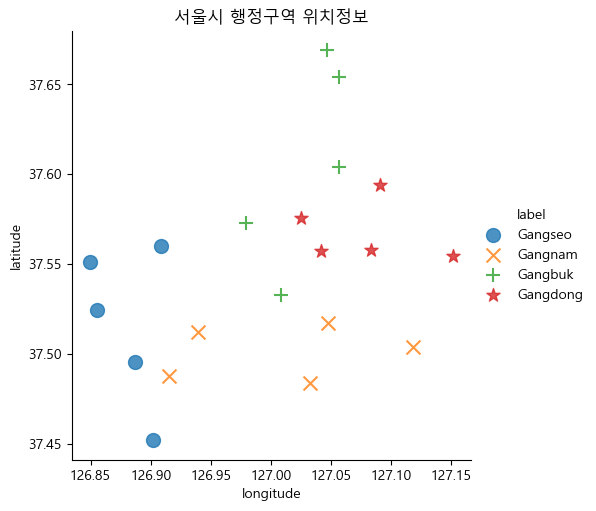

In [11]:
sns.lmplot(data=train_df, x='longitude', y='latitude', fit_reg=False,
           scatter_kws={'s':100},
           markers=['o', 'x', '+', '*'],
          hue='label')

plt.title("서울시 행정구역 위치정보")

<hr>

## 05. 데이터 다듬기
##### 학습/테스트 데이터에 필요없는 feature 제거
##### 구 이름 및 동 이름은 학습/테스트에 필요없으므로 제거

In [12]:
train_df_new = train_df.drop(['district'], axis=1)
test_df_new = test_df.drop(['dong'], axis=1)
print(train_df_new.shape)
print(test_df_new.shape)

(20, 3)
(20, 3)


In [13]:
# 훈련 데이터
X_train = train_df_new[['longitude', 'latitude']]
y_train = test_df_new[['label']]

In [14]:
# 테스트 데이터
X_test = test_df_new[['longitude', 'latitude']]
y_test = test_df_new[['label']]

<hr>

## 06. 모델 생성

In [15]:
from sklearn import tree
from sklearn import preprocessing

In [16]:
# LabelEncoder는 레이블을 숫자로 표현 (e.g. 강서구 >>)
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y_train)
y_encoded

array([3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [17]:
# 예측모델 생성 (의사결정트리)
clf = tree.DecisionTreeClassifier(random_state=35)
clf.fit(X_train, y_encoded)

DecisionTreeClassifier(random_state=35)

In [18]:
# 시각화 함수 선언
def display_decision_surface(clf, X, y):  # 모델과 모델의 데이터, 정답을 전달받음
    
    # 차트의 범위가 모든 학습 데이터를 포함하도록 설정
    x_min = X.longitude.min() - 0.01
    x_max = X.longitude.max() + 0.01
    y_min = X.latitude.min() - 0.01
    y_max = X.latitude.max() + 0.01
    
    # 파라미터 설정
    n_classes = len(le.classes_)   # 분류군의 개수 저장 (여기서는 0, 1, 2, 3)
    plot_colors = "rywb"
    plot_step = 0.001
    
    # 최솟값, 최댓값, 간격
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    # 2차원 행렬 데이터 xx, yy를 1차원으로 변환한 후 입력값으로 넣음 (ravel() 함수)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # contourf( [좌표값xx], [좌표값yy], [resizing 정보 Z], [출력할 배경화면=색상으로 영역 구분])
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    # 학습 데이터를 차트에 표시
    for i, color, in zip(range(n_classes), plot_colors): # 범주군의 수만큼 반복 (여기선 4개)
        idx = np.where(y == i)                # 색상을 통일시키는 인덱스값
        plt.scatter(x=X.loc[idx].longitude,
                   y=X.loc[idx].latitude,
                   c=color,                    # 색상
                   label=le.classes_[i],       # 범주로 출력할 값
                   cmap=plt.cm.RdYlBu,         # 데이터의 색상
                   edgecolors='black', s=150)  # 테두리와 사이즈 설정
        
    # 차트 제목
    plt.title("Decision surface of a decision tree", fontsize=16)
    # 범례
    # 그래프의 왼쪽 아래 꼭짓점은 (0, 0) >> 1.05는 그래프와 범례의 간격이 0.5라는 것
    # 그래프의 오른쪽 아래 꼭짓점은 (1, 0) >> 0.5는 바닥(y=0)에서 0.5(== 그래프의 절반)만큼 위에서 범례 출력
    plt.legend(bbox_to_anchor=(1.05, 0.5), loc='lower left', fontsize=14)
    
    # 변수 이름과 폰트 크기 설정
    plt.xlabel('longitude', fontsize=14)
    plt.ylabel('latitude', fontsize=14)

    # 차트 크기 설정
    plt.rcParams['figure.figsize'] = [7, 5]
    
    # x/y축 좌표상의 폰트 크기 설정
    plt.rcParams['xtick.labelsize'] = 10
    plt.rcParams['ytick.labelsize'] = 10

<hr>

## 07. 파라미터 없이 학습한 모델의 결정 표면 시각화

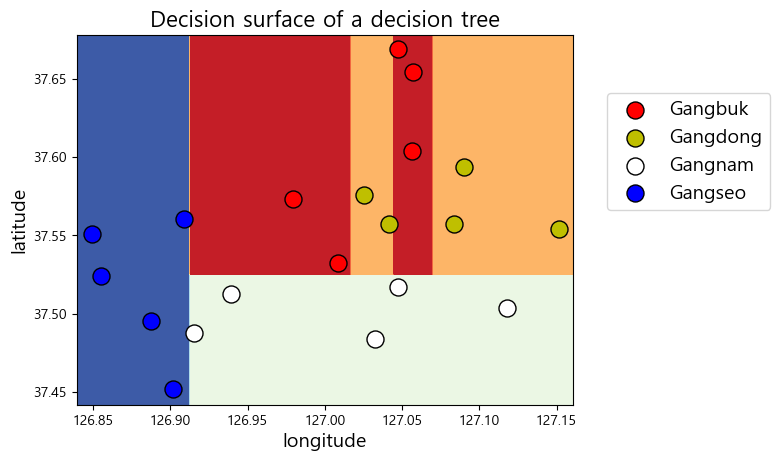

In [19]:
display_decision_surface(clf, X_train, y_encoded)

<hr>

## 08. 파라미터를 설정한 모델의 결정 표면 시각화

In [20]:
clf = tree.DecisionTreeClassifier(max_depth=4,          # 트리의 최대 깊이 설정
                                  min_samples_split=2,  # 자식 노드를 갖기 위한 최소한의 데이터 개수
                                  min_samples_leaf=2,   # 마지막 노드의 최소 데이터 갯수
                                  random_state=70
                                  )
clf.fit(X_train, y_encoded)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=70)

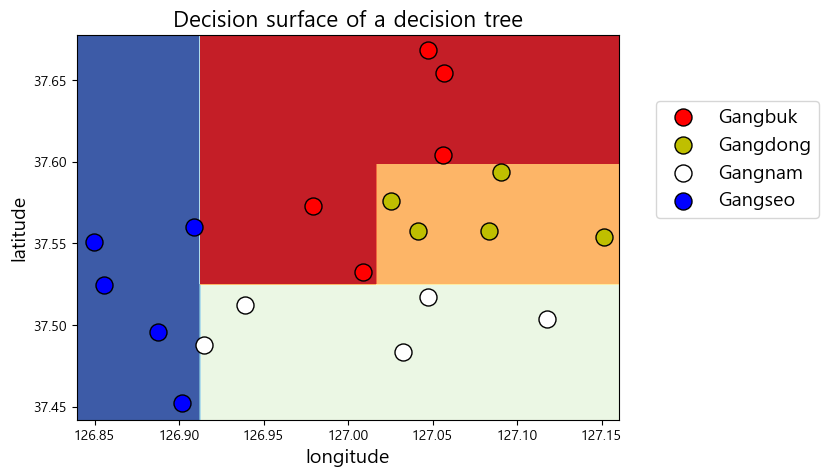

In [21]:
display_decision_surface(clf, X_train, y_encoded)

<br>

## 09. 의사결정트리 시각화

In [22]:
# conda install python-graphviz
import graphviz

In [23]:
dot_data = tree.export_graphviz(clf)
graph = graphviz.Source(dot_data)
graph.render('seoul')

'seoul.pdf'

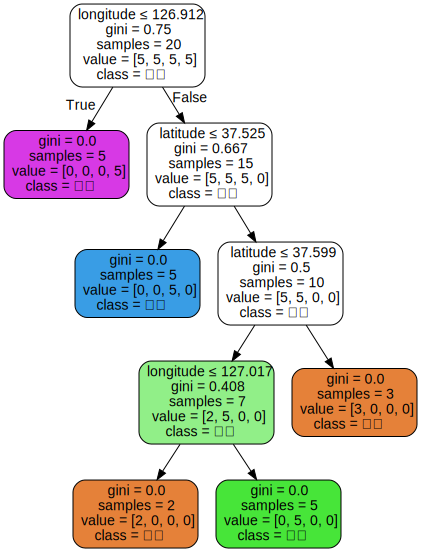

In [24]:
dot_data = tree.export_graphviz(clf, out_file=None,
                    feature_names=['longitude', 'latitude'],
                    # 클래스 이름 출력
                    class_names=['강북', '강동', '강남', '강서'],
                    # 아래 옵션의 기본값은 항상 True임 (참고로 적어놓은거)
                    filled=True,
                    rounded=True,
                    special_characters=True)
graph = graphviz.Source(dot_data)
graph

# gini 계수가 가장 높은 노드가 최상위에 위치

- **gini** : 불순도 척도. 0일 경우 모든 샘플이 하나의 레이블을 가지며, 1에 가까울수록 여러 레이블이 한 노드에 존재함
- **samples** : 노드 안에 들어있는 데이터의 수
- **value** : 레이블별 데이터의 개수
- **class**: 레이블

<hr>

## 10. 성능평가

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
pred = clf.predict(X_test)

In [27]:
# 정답과 예측값을 비교

comparison = pd.DataFrame({'예측값': le.classes_[pred], '정답':y_test.values.ravel()})
comparison

,예측값,정답
0,Gangseo,Gangseo
1,Gangseo,Gangseo
2,Gangseo,Gangseo
3,Gangseo,Gangseo
4,Gangseo,Gangseo
5,Gangnam,Gangnam
6,Gangnam,Gangnam
7,Gangnam,Gangnam
8,Gangnam,Gangnam
9,Gangnam,Gangnam


In [28]:
print('accuracy: ' + str(accuracy_score(y_test.values.ravel(), le.classes_[pred])))

accuracy: 1.0
